<a href="https://colab.research.google.com/github/nomchanz/graduation_thesis_new/blob/main/2020_12_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 必要なライブラリのimport
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
## データについて

### データファイルのpath
no_hole_path = 'no_hole_data.csv'
one_hole_size_path = 'one_hole_size_data.csv'
one_hole_position_path = 'one_hole_position_data.csv'
four_holes_size_path = 'four_holes_size_data.csv'
four_holes_position_path = 'four_holes_position_data.csv'
nine_holes_size_path = 'nine_holes_size_data.csv'
nine_holes_position_path = 'nine_holes_position_data.csv'
sixteen_holes_size_path = 'sixteen_holes_size_data.csv'
sixteen_holes_position_path = 'sixteen_holes_position_data.csv'
twentyfive_holes_size_path = 'twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = 'twentyfive_holes_position_data.csv'

### 入力データと正解データ
no_hole_data = []
size_x_data = []
position_x_data = []
y_data = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  for line in fs1:
    data_array = line.split(',')
    y_data.append(data_array[1:-1])
    size_x_data.append(data_array[0])
with open(four_holes_size_path) as fs2:
  for line in fs2:
    data_array = line.split(',')
    y_data.append(data_array[1:-1])
    size_x_data.append(data_array[0])
with open(nine_holes_size_path) as fs3:
  for line in fs3:
    data_array = line.split(',')
    y_data.append(data_array[1:-1])
    size_x_data.append(data_array[0])
with open(sixteen_holes_size_path) as fs4:
  for line in fs4:
    data_array = line.split(',')
    y_data.append(data_array[1:-1])
    size_x_data.append(data_array[0])
with open(twentyfive_holes_size_path) as fs5:
  for line in fs5:
    data_array = line.split(',')
    y_data.append(data_array[1:-1])
    size_x_data.append(data_array[0])

#### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  for line in fp1:
    data_array = line.split(',')
    position_x_data.append(data_array[0])
with open(four_holes_position_path) as fp2:
  for line in fp2:
    data_array = line.split(',')
    position_x_data.append(data_array[0])
with open(nine_holes_position_path) as fp3:
  for line in fp3:
    data_array = line.split(',')
    position_x_data.append(data_array[0])
with open(sixteen_holes_position_path) as fp4:
  for line in fp4:
    data_array = line.split(',')
    position_x_data.append(data_array[0])
with open(twentyfive_holes_position_path) as fp5:
  for line in fp5:
    data_array = line.split(',')
    position_x_data.append(data_array[0])

### 各配列をnp.array型にして各要素を型変換
no_hole_data = np.array(no_hole_data, dtype=float)
y_data = np.array(y_data, dtype=float)
size_x_data = np.array(size_x_data, dtype=int)
position_x_data = np.array(position_x_data, dtype=int)

### 大きさと位置のデータを結合
x_data = np.stack([size_x_data, position_x_data], 1)

### train用とtest用に分割(4:1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size= 0.08, test_size=0.02)

### 一旦分割
size_x_train, position_x_train = np.hsplit(x_train, 2)
size_x_test, position_x_test = np.hsplit(x_test, 2)

### 入力データの正規化
def min_max(x, axis=None):
    min = x.min(axis=axis, keepdims=True)
    max = x.max(axis=axis, keepdims=True)
    result = (x-min)/(max-min)
    return result
size_x_train_norm = min_max(size_x_train)
position_x_train_norm = min_max(position_x_train)
size_x_test_norm = min_max(size_x_test)
position_x_test_norm = min_max(position_x_test)

### 再度結合
X_train = np.stack([size_x_train_norm, position_x_train_norm], 1)
X_test = np.stack([size_x_test_norm, position_x_test_norm], 1)

In [ ]:
x_train

array([[ 3, 21],
       [ 1, 23],
       [ 4,  8],
       ...,
       [ 5,  8],
       [ 5,  2],
       [ 2,  3]])

In [ ]:
### データの加工
y_data = (y_data-no_hole_data)
#x_data = keras.utils.to_categorical(size_x_data, 6)
#position_x_data = (position_x_data-1)
#position_x_data = keras.utils.to_categorical(position_x_data, 25)


### train用とtest用に分割(4:1)
#x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size= 0.08, test_size=0.02)

### reshape
X_train = X_train.reshape(811, 2, 1)
X_test = X_test.reshape(203, 2, 1)

In [ ]:
## CNN

### modelの作成
model = Sequential()
### 畳み込み層
model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(2, 1)))
### プーリング層
model.add(MaxPooling1D(2, padding='same'))
### Flatten層
model.add(Flatten())
### 全結合層
model.add(Dense(50, activation='linear'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
model.compile(loss='mse', optimizer=adam, metrics=['mae'])

In [ ]:
# 学習
epochs = 3000
batch_size = 64
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 501/3000
13/13 [==============================] - 0s 6ms/step - loss: 1.5900 - mae: 0.4078 - val_loss: 0.3076 - val_mae: 0.3517
Epoch 502/3000
13/13 [==============================] - 0s 5ms/step - loss: 2.2798 - mae: 0.4503 - val_loss: 0.3056 - val_mae: 0.3567
Epoch 503/3000
13/13 [==============================] - 0s 6ms/step - loss: 0.5681 - mae: 0.3901 - val_loss: 0.3021 - val_mae: 0.3535
Epoch 504/3000
13/13 [==============================] - 0s 6ms/step - loss: 0.7908 - mae: 0.3996 - val_loss: 0.2992 - val_mae: 0.3457
Epoch 505/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.7986 - mae: 0.3864 - val_loss: 0.2974 - val_mae: 0.3414
Epoch 506/3000
13/13 [==============================] - 0s 5ms/step - loss: 2.2377 - mae: 0.4271 - val_loss: 0.2957 - val_mae: 0.3407
Epoch 507/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.4585 - mae: 0.3614 - val_loss: 0.2932 - val_mae: 0.3445
Epoch 508/3000
13/13 [========

In [ ]:
# モデルの評価
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test mae:', score[1])

7/7 [==============================] - 0s 2ms/step - loss: 0.1786 - mae: 0.2015
Test loss: 0.1785527914762497
Test mae: 0.20151586830615997


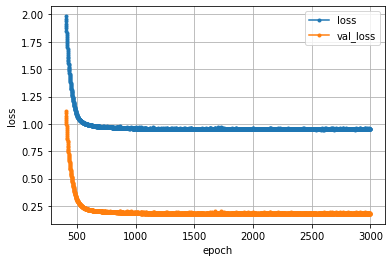

In [ ]:
# 学習経過の可視化(大きさ)
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
for i in range(900):
  if max(loss)>2: 
    loss = loss[1:]
    val_loss = val_loss[1:]
  else:
    plt.plot(range(i,nb_epoch), loss, marker='.', label='loss')
    plt.plot(range(i,nb_epoch), val_loss, marker='.', label='val_loss')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

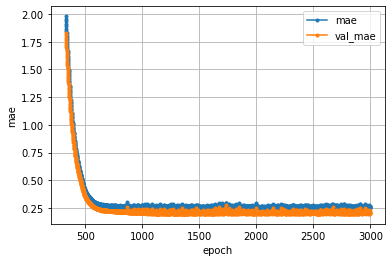

In [ ]:
# 学習経過の可視化(大きさ)
mae     = history.history['mae']
val_mae = history.history['val_mae']

nb_epoch = len(mae)
for i in range(900):
  if max(mae)>2: 
    mae = mae[1:]
    val_mae = val_mae[1:]
  else:
    plt.plot(range(i,nb_epoch), mae,     marker='.', label='mae')
    plt.plot(range(i,nb_epoch), val_mae, marker='.', label='val_mae')
    break
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.show()

In [ ]:
### モデルを保存

model.save('fourth_model.h5')

In [ ]:
size_x_data_norm = min_max(size_x_data)
position_x_data_norm = min_max(position_x_data)

X_data = np.stack([size_x_data_norm, position_x_data_norm], 1)
X_data = X_data.reshape(10141,2,1)
model.predict(X_data)
y_data_new = model.predict(X_data)

In [ ]:
np.savetxt('y_data_new2.csv',y_data_new,delimiter=',')

In [ ]:
size_x_train=size_x_train.reshape(811,)
size_x_test=size_x_test.reshape(203,)
size_x_data=size_x_data.reshape(10141,)

position_x_train=position_x_train.reshape(811,)
position_x_test=position_x_test.reshape(203,)
position_x_data=position_x_data.reshape(10141,)

In [ ]:


print(size_x_train.shape)
print(size_x_test.shape)
print(size_x_data.shape)
print(position_x_train.shape)
print(position_x_test.shape)
print(position_x_data.shape)

(811,)
(203,)
(10141,)
(811,)
(203,)
(10141,)


In [ ]:
small_x_data = np.append(x_train, x_test, axis=0)
small_size_x_data = np.append(size_x_train, size_x_test, axis=0) 
small_position_x_data = np.append(position_x_train, position_x_test, axis=0) 
small_y_data = np.append(y_train, y_test, axis=0)

sum_x_data = np.append(small_x_data, x_data, axis=0)
sum_size_x_data = np.append(small_size_x_data, size_x_data, axis=0)
sum_position_x_data = np.append(small_position_x_data, position_x_data, axis=0)
sum_y_data = np.append(small_y_data, y_data_new, axis=0)

In [ ]:
small_size_x_data

array([3, 1, 4, ..., 2, 3, 2])

In [ ]:
np.savetxt('small_x_data.csv',small_x_data,delimiter=',')
np.savetxt('small_size_x_data.csv',small_size_x_data,delimiter=',')
np.savetxt('small_position_x_data.csv',small_position_x_data,delimiter=',')
np.savetxt('small_y_data.csv',small_y_data,delimiter=',')

np.savetxt('sum_x_data.csv',sum_x_data,delimiter=',')
np.savetxt('sum_size_x_data.csv',sum_size_x_data,delimiter=',')
np.savetxt('sum_position_x_data.csv',sum_position_x_data,delimiter=',')
np.savetxt('sum_y_data.csv',sum_y_data,delimiter=',')

In [ ]:
sum_size_x_data

array([3, 1, 4, ..., 5, 5, 5])

In [ ]:
### データの加工
sum_size_x_data = keras.utils.to_categorical(sum_size_x_data, 6)
sum_position_x_data = (sum_position_x_data-1)
sum_position_x_data = keras.utils.to_categorical(sum_position_x_data, 25)

### train用とtest用に分割(4:1)
sum_y_train, sum_y_test, sum_size_x_train, sum_size_x_test, sum_position_x_train, sum_position_x_test = train_test_split(sum_y_data, sum_size_x_data, sum_position_x_data,  test_size=0.20)

### reshape
sum_y_train = sum_y_train.reshape(8924, 50, 1)
sum_y_test = sum_y_test.reshape(2231, 50, 1)

In [ ]:
###CNN(大きさ)

### modelの作成
sum_model = Sequential()
### 畳み込み層
sum_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
sum_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
sum_model.add(Flatten())
### 全結合層
sum_model.add(Dense(6, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
sum_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
###学習(大きさ)
epochs = 1500
batch_size = 128
sum_history = sum_model.fit(sum_y_train, sum_size_x_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(sum_y_test, sum_size_x_test))

Epoch 1/1500
70/70 [==============================] - 1s 13ms/step - loss: 4.1202 - accuracy: 0.2093 - val_loss: 1.6440 - val_accuracy: 0.1905
Epoch 2/1500
70/70 [==============================] - 1s 10ms/step - loss: 1.6821 - accuracy: 0.2097 - val_loss: 1.6608 - val_accuracy: 0.2116
Epoch 3/1500
70/70 [==============================] - 1s 10ms/step - loss: 1.6852 - accuracy: 0.2111 - val_loss: 1.7367 - val_accuracy: 0.1896
Epoch 4/1500
70/70 [==============================] - 1s 10ms/step - loss: 1.6983 - accuracy: 0.2107 - val_loss: 1.8128 - val_accuracy: 0.1896
Epoch 5/1500
70/70 [==============================] - 1s 9ms/step - loss: 1.7073 - accuracy: 0.2083 - val_loss: 1.6650 - val_accuracy: 0.1793
Epoch 6/1500
70/70 [==============================] - 1s 10ms/step - loss: 1.7036 - accuracy: 0.2047 - val_loss: 1.6469 - val_accuracy: 0.1999
Epoch 7/1500
70/70 [==============================] - 1s 10ms/step - loss: 1.6732 - accuracy: 0.2037 - val_loss: 1.6864 - val_accuracy: 0.1896


In [ ]:
### モデルの評価(大きさ)
y_data_evaluation = y_data.reshape(10141,50,1)
size_x_data_evaluation = keras.utils.to_categorical(size_x_data, 6)
sum_score = sum_model.evaluate(y_data_evaluation, size_x_data_evaluation, verbose=1)
print('Test loss:', sum_score[0])
print('Test accuracy:', sum_score[1])

317/317 [==============================] - 0s 1ms/step - loss: 11.7876 - accuracy: 0.2179
Test loss: 11.787646293640137
Test accuracy: 0.2179272323846817


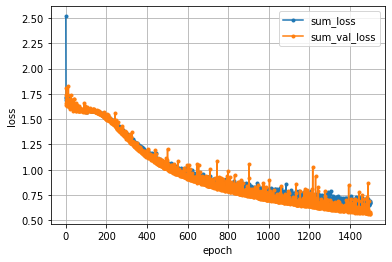

In [ ]:
### 学習経過(損失関数)の可視化(大きさ)
sum_loss     = sum_history.history['loss']
sum_val_loss = sum_history.history['val_loss']

nb_epoch = len(sum_loss)
plt.plot(range(nb_epoch), sum_loss,     marker='.', label='sum_loss')
plt.plot(range(nb_epoch), sum_val_loss, marker='.', label='sum_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


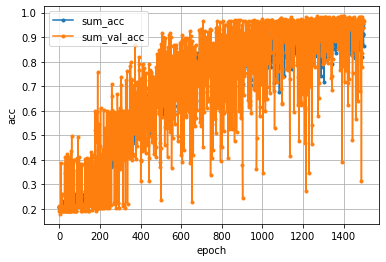

In [ ]:
### 学習経過(評価関数)の可視化(大きさ)
sum_acc     = sum_history.history['accuracy']
sum_val_acc = sum_history.history['val_accuracy']

nb_epoch = len(sum_acc)
plt.plot(range(nb_epoch), sum_acc,     marker='.', label='sum_acc')
plt.plot(range(nb_epoch), sum_val_acc, marker='.', label='sum_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [ ]:
###CNN(位置)

### modelの作成
sum_position_model = Sequential()
### 畳み込み層
sum_position_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
sum_position_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
sum_position_model.add(Flatten())
### 全結合層
sum_position_model.add(Dense(25, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

### modelのコンパイル
sum_position_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
### 学習(位置)
epochs = 3000
batch_size = 128
sum_position_history = sum_position_model.fit(sum_y_train, sum_position_x_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(sum_y_test, sum_position_x_test))

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
70/70 [==============================] - 1s 8ms/step - loss: 2.6608 - accuracy: 0.1632 - val_loss: 2.6908 - val_accuracy: 0.1488
Epoch 502/3000
70/70 [==============================] - 1s 8ms/step - loss: 2.6747 - accuracy: 0.1494 - val_loss: 2.6884 - val_accuracy: 0.1672
Epoch 503/3000
70/70 [==============================] - 1s 8ms/step - loss: 2.6539 - accuracy: 0.1769 - val_loss: 2.6528 - val_accuracy: 0.1842
Epoch 504/3000
70/70 [==============================] - 1s 8ms/step - loss: 2.6602 - accuracy: 0.1623 - val_loss: 2.6720 - val_accuracy: 0.1865
Epoch 505/3000
70/70 [==============================] - 1s 8ms/step - loss: 2.6482 - accuracy: 0.1736 - val_loss: 2.6537 - val_accuracy: 0.1488
Epoch 506/3000
70/70 [==============================] - 1s 8ms/step - loss: 2.6457 - accuracy: 0.1900 - val_loss: 2.6577 - val_accuracy: 0.1466
Epoch 507/3000
70/70 [==============================] - 1s 8ms/step - loss: 2.6576 - 

In [35]:
### モデルの評価
position_x_data_minus = (position_x_data-1)
position_x_data_evaluation = keras.utils.to_categorical(position_x_data_minus, 25)
sum_position_score = sum_position_model.evaluate(y_data_evaluation, position_x_data_evaluation, verbose=1)
print('Test loss:', sum_position_score[0])
print('Test accuracy:', sum_position_score[1])

317/317 [==============================] - 0s 1ms/step - loss: 39.1238 - accuracy: 0.0464
Test loss: 39.12380599975586
Test accuracy: 0.046445123851299286


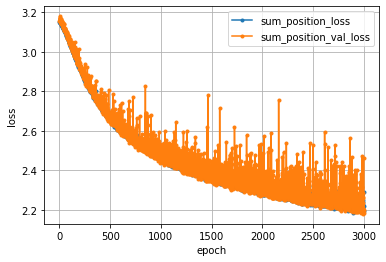

In [36]:
### 学習経過(損失関数)の可視化(位置)
sum_position_loss     = sum_position_history.history['loss']
sum_position_val_loss = sum_position_history.history['val_loss']

nb_epoch = len(sum_position_loss)
plt.plot(range(nb_epoch), sum_position_loss,     marker='.', label='sum_position_loss')
plt.plot(range(nb_epoch), sum_position_val_loss, marker='.', label='sum_position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

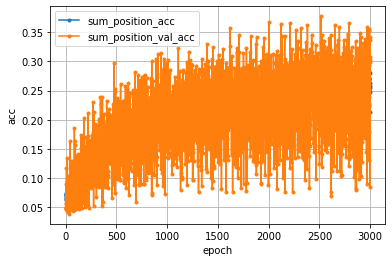

In [37]:
### 学習経過(評価関数)の可視化(位置)
sum_position_acc     = sum_position_history.history['accuracy']
sum_position_val_acc = sum_position_history.history['val_accuracy']

nb_epoch = len(sum_position_acc)
plt.plot(range(nb_epoch), sum_position_acc,     marker='.', label='sum_position_acc')
plt.plot(range(nb_epoch), sum_position_val_acc, marker='.', label='sum_position_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [38]:
### 少ない数の元データから学習

### データの加工
small_size_x_data = keras.utils.to_categorical(small_size_x_data, 6)
small_position_x_data = (small_position_x_data-1)
small_position_x_data = keras.utils.to_categorical(small_position_x_data, 25)

### train用とtest用に分割(4:1)
small_y_train, small_y_test, small_size_x_train, small_size_x_test, small_position_x_train, small_position_x_test = train_test_split(small_y_data, small_size_x_data, small_position_x_data,  test_size=0.20)

### reshape
small_y_train = small_y_train.reshape(811, 50, 1)
small_y_test = small_y_test.reshape(203, 50, 1)

In [39]:
###CNN(大きさ)

### modelの作成
small_size_model = Sequential()
### 畳み込み層
small_size_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
small_size_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
small_size_model.add(Flatten())
### 全結合層
small_size_model.add(Dense(6, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
small_size_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [40]:
small_size_x_data

array([[0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [41]:
###学習(大きさ)
epochs = 4000
batch_size = 64
small_size_history = small_size_model.fit(small_y_train, small_size_x_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(small_y_test, small_size_x_test))

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 1501/4000
13/13 [==============================] - 0s 10ms/step - loss: 1.5868 - accuracy: 0.2203 - val_loss: 1.5298 - val_accuracy: 0.3054
Epoch 1502/4000
13/13 [==============================] - 0s 10ms/step - loss: 1.5948 - accuracy: 0.2534 - val_loss: 1.6461 - val_accuracy: 0.1626
Epoch 1503/4000
13/13 [==============================] - 0s 10ms/step - loss: 1.5737 - accuracy: 0.2224 - val_loss: 1.5987 - val_accuracy: 0.1576
Epoch 1504/4000
13/13 [==============================] - 0s 10ms/step - loss: 1.5530 - accuracy: 0.2483 - val_loss: 1.5553 - val_accuracy: 0.2512
Epoch 1505/4000
13/13 [==============================] - 0s 10ms/step - loss: 1.5290 - accuracy: 0.3604 - val_loss: 1.5281 - val_accuracy: 0.2956
Epoch 1506/4000
13/13 [==============================] - 0s 11ms/step - loss: 1.5242 - accuracy: 0.3542 - val_loss: 1.5500 - val_accuracy: 0.2709
Epoch 1507/4000
13/13 [==============================] - 0s 10ms/step - loss: 1.5391 - accur

In [42]:
### モデルの評価(大きさ)
y_data_evaluation = y_data.reshape(10141,50,1)
size_x_data_evaluation = keras.utils.to_categorical(size_x_data, 6)
small_size_score = small_size_model.evaluate(y_data_evaluation, size_x_data_evaluation, verbose=1)
print('Test loss:', small_size_score[0])
print('Test accuracy:', small_size_score[1])

317/317 [==============================] - 1s 2ms/step - loss: 1.9003 - accuracy: 0.2499
Test loss: 1.900316834449768
Test accuracy: 0.2498767375946045


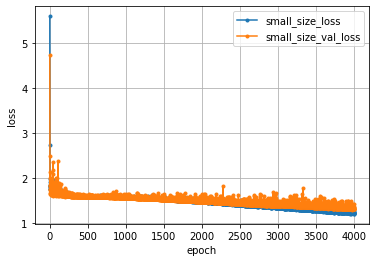

In [43]:
### 学習経過(損失関数)の可視化(大きさ)
small_size_loss     = small_size_history.history['loss']
small_size_val_loss = small_size_history.history['val_loss']

nb_epoch = len(small_size_loss)
plt.plot(range(nb_epoch), small_size_loss,     marker='.', label='small_size_loss')
plt.plot(range(nb_epoch), small_size_val_loss, marker='.', label='small_size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


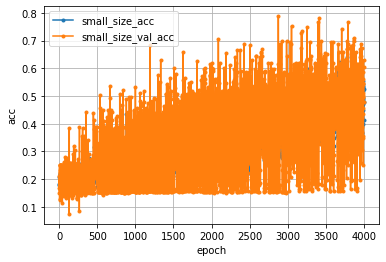

In [44]:
### 学習経過(評価関数)の可視化(大きさ)
small_size_acc     = small_size_history.history['accuracy']
small_size_val_acc = small_size_history.history['val_accuracy']

nb_epoch = len(small_size_acc)
plt.plot(range(nb_epoch), small_size_acc,     marker='.', label='small_size_acc')
plt.plot(range(nb_epoch), small_size_val_acc, marker='.', label='small_size_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [47]:
###CNN(位置)

### modelの作成
small_position_model = Sequential()
### 畳み込み層
small_position_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
small_position_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
small_position_model.add(Flatten())
### 全結合層
small_position_model.add(Dense(25, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
small_position_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [48]:
###学習(位置)
epochs = 4000
batch_size = 64
small_position_history = small_position_model.fit(small_y_train, small_position_x_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(small_y_test, small_position_x_test))

ストリーミング出力は最後の 5000 行に切り捨てられました。
Epoch 1501/4000
13/13 [==============================] - 0s 10ms/step - loss: 2.8199 - accuracy: 0.1931 - val_loss: 2.9586 - val_accuracy: 0.1823
Epoch 1502/4000
13/13 [==============================] - 0s 10ms/step - loss: 2.8888 - accuracy: 0.1903 - val_loss: 2.9288 - val_accuracy: 0.1675
Epoch 1503/4000
13/13 [==============================] - 0s 10ms/step - loss: 2.8643 - accuracy: 0.2068 - val_loss: 2.9785 - val_accuracy: 0.1379
Epoch 1504/4000
13/13 [==============================] - 0s 10ms/step - loss: 2.9021 - accuracy: 0.1961 - val_loss: 2.9457 - val_accuracy: 0.1724
Epoch 1505/4000
13/13 [==============================] - 0s 10ms/step - loss: 2.8924 - accuracy: 0.1643 - val_loss: 2.9570 - val_accuracy: 0.1527
Epoch 1506/4000
13/13 [==============================] - 0s 10ms/step - loss: 2.8643 - accuracy: 0.1861 - val_loss: 2.9748 - val_accuracy: 0.1330
Epoch 1507/4000
13/13 [==============================] - 0s 11ms/step - loss: 2.8875 - accur

In [52]:
### モデルの評価(位置)
y_data_evaluation = y_data.reshape(10141,50,1)
position_x_data = (position_x_data-1)
position_x_data_evaluation = keras.utils.to_categorical(position_x_data, 25)
small_position_score = small_position_model.evaluate(y_data_evaluation, position_x_data_evaluation, verbose=1)
print('Test loss:', small_position_score[0])
print('Test accuracy:', small_position_score[1])

317/317 [==============================] - 0s 1ms/step - loss: 3.2230 - accuracy: 0.0376
Test loss: 3.2230026721954346
Test accuracy: 0.03757026046514511


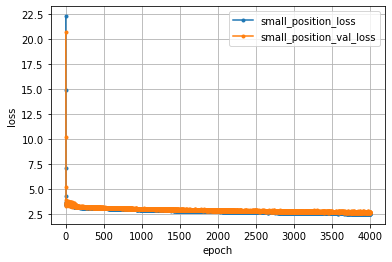

In [53]:
### 学習経過(損失関数)の可視化(位置)
small_position_loss     = small_position_history.history['loss']
small_position_val_loss = small_position_history.history['val_loss']

nb_epoch = len(small_position_loss)
plt.plot(range(nb_epoch), small_position_loss,     marker='.', label='small_position_loss')
plt.plot(range(nb_epoch), small_position_val_loss, marker='.', label='small_position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


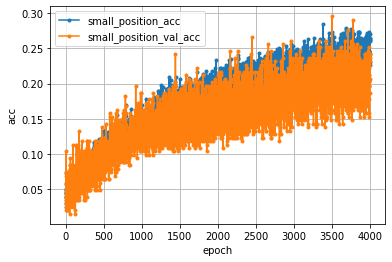

In [54]:
### 学習経過(評価関数)の可視化(位置)
small_position_acc     = small_position_history.history['accuracy']
small_position_val_acc = small_position_history.history['val_accuracy']

nb_epoch = len(small_position_acc)
plt.plot(range(nb_epoch), small_position_acc,     marker='.', label='small_position_acc')
plt.plot(range(nb_epoch), small_position_val_acc, marker='.', label='small_position_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()